In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255

train_scaled_sep , val_scaled, train_target_sep, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def model_function(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_function()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

history = model.fit(train_scaled_sep, train_target_sep, epochs = 5, verbose = 0)

In [6]:
print(history.history.keys())# 딕셔너리 자료구조

dict_keys(['accuracy', 'loss'])


In [7]:
print(history.history['accuracy'])

[0.8122708201408386, 0.859083354473114, 0.8710833191871643, 0.8801041841506958, 0.8857499957084656]


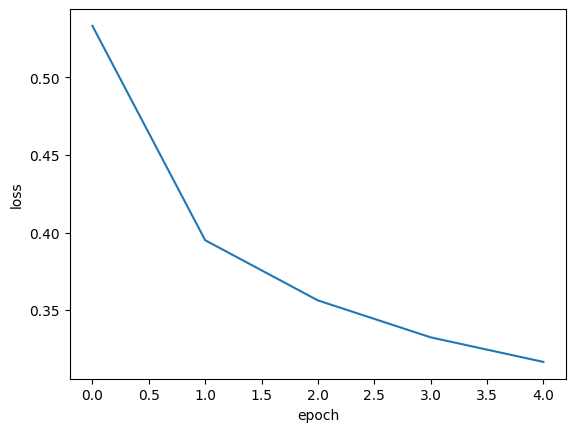

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.savefig("relu_epoch-loss", dpi = 300)

plt.show()

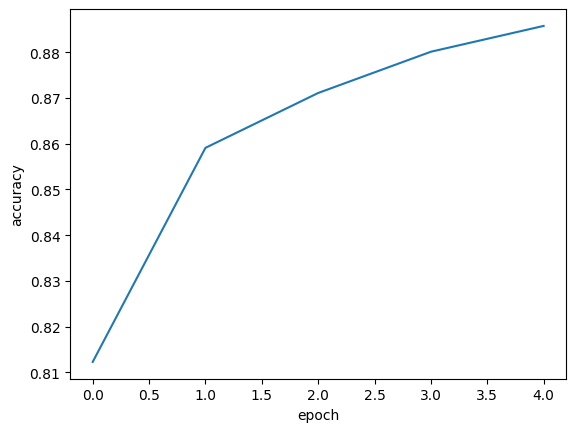

In [9]:
plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('relu_epoch-accuracy',dpi = 300)

plt.show()

In [10]:
model = model_function()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history_20 = model.fit(train_scaled_sep, train_target_sep, epochs=20, verbose=0)


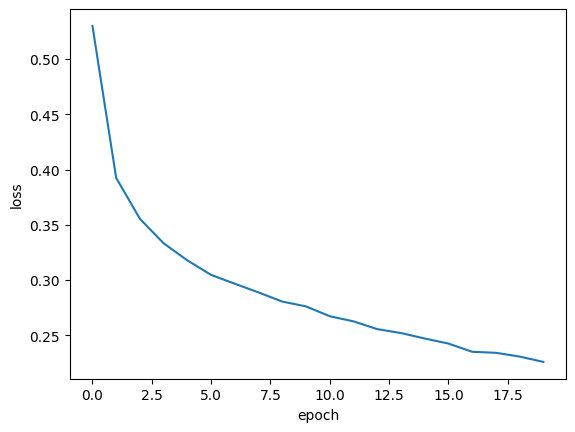

In [12]:
import matplotlib.pyplot as plt

plt.plot(history_20.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.savefig("relu_epoch-loss", dpi = 300)

plt.show()

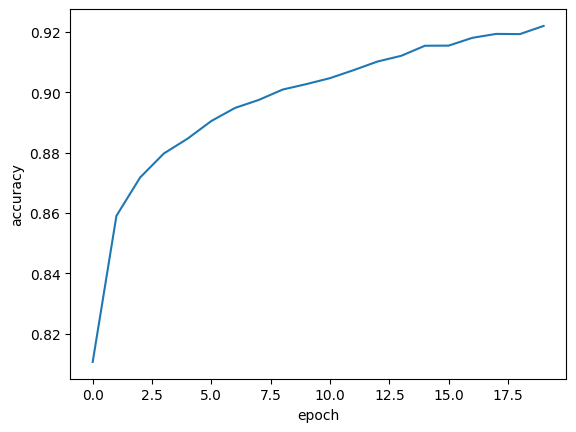

In [13]:
plt.plot(history_20.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('relu_epoch-accuracy',dpi = 300)

plt.show()

# 모델 검증

In [14]:
model_val = model_function()

model_val.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history_val = model_val.fit(
    train_scaled_sep,train_target_sep,epochs = 20, verbose = 0, validation_data = (val_scaled, val_target)
    )

In [15]:
# 신경망 모델 검증 방법
# fit(X,y,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
# or
## 검증 데이터를 미리 분할하지 않은경우
# fit(X,y,epochs=20,verbose = 0,validation_split=0.2)

In [16]:
print(history_val.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


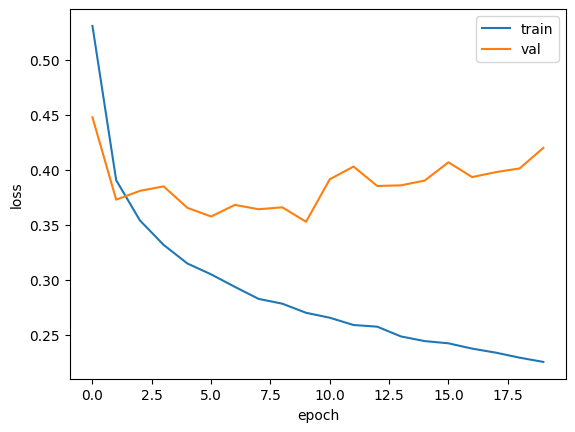

In [17]:
plt.plot(history_val.history['loss'])

plt.plot(history_val.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])
plt.show()
# 적합한 에포크 : 데이터간에 손실 차이가 많이 나지 않는 선에서 손실을 줄여주는 에포크

In [18]:
# 옵티마이저를 바꿔본다.

model_adam = model_function()

model_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history_adam = model_adam.fit(train_scaled, train_target,
                              epochs=20, verbose = 0, batch_size = 32,
                              validation_split=0.2)

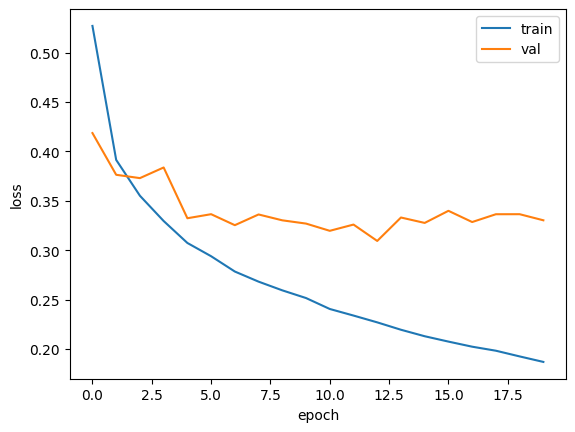

In [20]:
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,022 (621.18 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 79,512 (310.60 KB)

# 드롭아웃

In [22]:
model_do = model_function(keras.layers.Dropout(0.3))

model_do.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_do.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

history_do = model_do.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_split = 0.2)

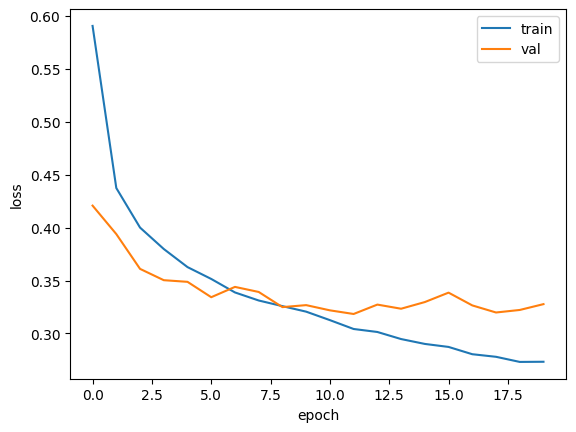

In [24]:
plt.plot(history_do.history['loss'])
plt.plot(history_do.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel("loss")

plt.legend(['train','val'])

plt.show()

## 모델 저장과 복원

In [25]:
# 모델 파라미터 저장 --> weights.h5
# 모델 구조와 파라미터 저장 --> .keras

model_do.save_weights("initial_model.weights.h5")

In [26]:
## 모델 파라미터를 통해 모델을 불러오려면 모델의 구조는 만들어야 한다.
service_model_do = model_function(keras.layers.Dropout(0.3))

service_model_do.load_weights("initial_model.weights.h5")

In [27]:
service_model_do.predict(val_scaled[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


array([[5.90577804e-12, 7.32787000e-19, 4.84811539e-14, 3.48839813e-14,
        4.18563323e-13, 7.73799798e-07, 4.10023713e-14, 6.10089668e-09,
        9.99999166e-01, 1.62033168e-15],
       [1.80776169e-07, 9.42060515e-17, 2.13726190e-10, 2.50058764e-16,
        2.42896133e-12, 2.71815168e-07, 8.11955800e-08, 2.34103247e-17,
        9.99999523e-01, 5.01111785e-16],
       [1.67682824e-16, 2.28251302e-15, 1.85671319e-20, 1.59525738e-15,
        1.83724013e-19, 8.99025617e-05, 2.12528838e-16, 9.99910116e-01,
        7.36859573e-10, 1.19889902e-08],
       [1.29667969e-04, 1.68012275e-06, 1.73238069e-01, 2.92921526e-04,
        6.58454061e-01, 2.94098903e-12, 1.67877287e-01, 2.71853872e-12,
        6.36504274e-06, 2.17368044e-08],
       [1.81452033e-15, 2.89435098e-19, 1.11975207e-19, 1.74443481e-15,
        1.03598912e-18, 7.22871434e-08, 1.24190012e-18, 1.65245979e-07,
        9.99999762e-01, 1.30125445e-14]], dtype=float32)

In [28]:
import numpy as np
val_labels = np.argmax(service_model_do.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.91125


In [29]:
print(val_labels[:25])
print(val_target[:25])

[8 8 7 4 8 4 1 0 4 5 0 7 4 9 2 1 1 3 3 9 9 0 2 6 9]
[8 8 7 4 8 4 1 0 4 5 3 7 4 9 4 1 1 3 3 9 9 0 2 6 9]


In [30]:
model_do.save("dropout_model.keras")

In [31]:
service_model_dropout = keras.models.load_model("dropout_model.keras")

service_model_dropout.evaluate(val_scaled, val_target)

val_labels = np.argmax(service_model_dropout.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target)) # 일종의 정확도 근데 왜 값이 다르냐? evaluate는 batch_size 적용

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2421
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.91125


# 콜백

In [32]:
model_callback = model_function(keras.layers.Dropout(0.3))

model_callback.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    "best_model.keras", save_best_only = True
) # 최상의 검증점수를 만드는 모델 저장하는 콜백함수
## 콜백함수란 케라스 모델 훈련 도중에 어떤 작업을 수행할 수 있게 도와주는 도구

model_callback.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_callback.fit(train_scaled, train_target, epochs = 20,
                   verbose = 0, validation_split = 0.2, callbacks = [checkpoint_callback])

In [34]:
service_model_best = keras.models.load_model("best_model.keras")

service_model_best.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

In [35]:
service_model_best.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9067 - loss: 0.2551


[0.25455522537231445, 0.9049999713897705]

In [38]:
model_cb_es = model_function(keras.layers.Dropout(0.3))
model_cb_es.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

check_point_cb = keras.callbacks.ModelCheckpoint("best_cb_model.keras", save_best_only= True)
# Early Stopping 콜백 : 모델 학습의 조기 종료를 가능하게 한다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights = True)
# patience 값 연속으로 검증 점수가 향상되지 않는다면 훈련을 중지하고 모델의 최상의 파라미터로 됮돌림

history_cb_es = model_cb_es.fit(train_scaled_sep,train_target_sep,epochs=20,
                                verbose = 0, validation_data = (val_scaled,val_target),
                                callbacks = [check_point_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
print(early_stopping_cb.stopped_epoch) # 훈련 중지 에포크
# patience = 2이므로 13이 최상의 에포크

## 연속 검증 점수 향상에서 비교되는 쪽은 증가가 시작되기전 그 부분인듯

11


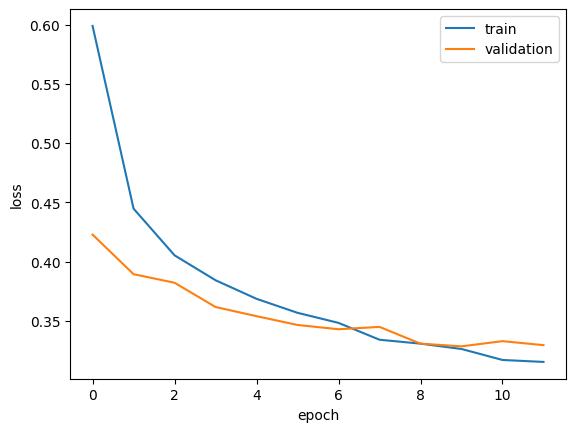

In [40]:
plt.plot(history_cb_es.history['loss'], label = "train")

plt.plot(history_cb_es.history['val_loss'], label = "validation")

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()

plt.show()

In [42]:
print(history_cb_es.history['val_loss'])


[0.4227765202522278, 0.38940194249153137, 0.382176011800766, 0.3617105782032013, 0.3539777100086212, 0.3465628921985626, 0.3429619073867798, 0.3449442982673645, 0.3308124840259552, 0.32853418588638306, 0.33291175961494446, 0.32954832911491394]


In [49]:
a = np.array([[1,2,3]])

b = np.array([[1],
             [2],
             [3]])
print(a,'\n',b)
print(a.shape,'\n',b.shape)

c = a+b

print(c)

[[1 2 3]] 
 [[1]
 [2]
 [3]]
(1, 3) 
 (3, 1)
[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [50]:
a = np.array([[1,2,3],
               [4,5,6]])

b = np.array([[1,2],
             [3,4],
             [5,6]])
print(a,'\n',b)
print(a.shape,'\n',b.shape)

c = a+b

print(c)

[[1 2 3]
 [4 5 6]] 
 [[1 2]
 [3 4]
 [5 6]]
(2, 3) 
 (3, 2)


ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [51]:
a = np.array([1,2,3])

b = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
print(a,'\n',b)
print(a.shape,'\n',b.shape)

c = a+b

print(c)

[1 2 3] 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
(3,) 
 (3, 3)
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]
